<a href="https://colab.research.google.com/github/ValdazoAmerico/deep-learning-tensorflow/blob/main/deep_learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.neural_network import MLPClassifier

In [2]:
#Install tensorflow & tensorboard
!pip install tensorflow
!pip install tensorboard

In [3]:
#Check version
import tensorflow as tf
print(tf.__version__)

2.6.0


In [5]:
#Load dataset
import pandas as pd
df = pd.read_csv('bank-full.csv',sep=";")

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
#Feature Engineering
#Get categorical
cat_columns = df.select_dtypes(include=['object','category']).columns.tolist()

In [8]:
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [9]:
cat_columns = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',]

In [10]:
#Numerical columns
num_columns = df.select_dtypes(exclude=['object','category']).columns.tolist()

In [11]:
num_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [12]:
#Label encoding target
df['y'].unique()
df['y'] = df['y'].map({'no':0,'yes':1})

array(['no', 'yes'], dtype=object)

In [14]:
#Feature Encoding : Categorical
ord_enc = OrdinalEncoder()

In [15]:
#Unencoded
df2 = df.copy()

In [16]:
df[cat_columns] = ord_enc.fit_transform(df[cat_columns])

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0


In [18]:
#Get categories
ord_enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [19]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

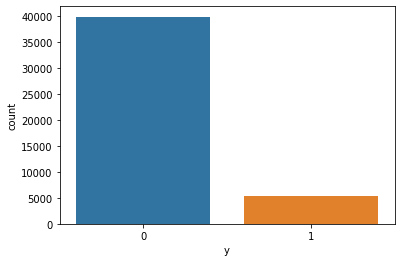

In [21]:
#Plot of target distribution
sns.countplot(x='y', data=df)

In [22]:
#Imbalanced dataset
df['y'].value_counts().div(df.shape[0]).mul(100)

0    88.30152
1    11.69848
Name: y, dtype: float64

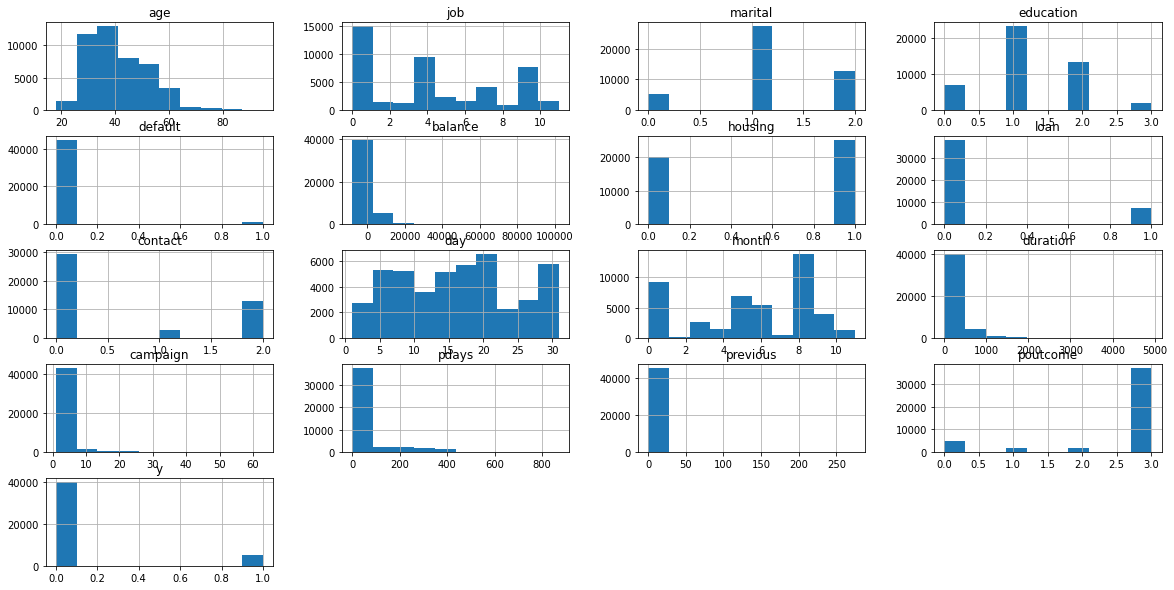

In [23]:
#Distribution of entire dataset
df.hist(figsize=(20,10))
plt.show()

In [24]:
#Correlation plot
corr_mat = df.corr()
corr_mat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


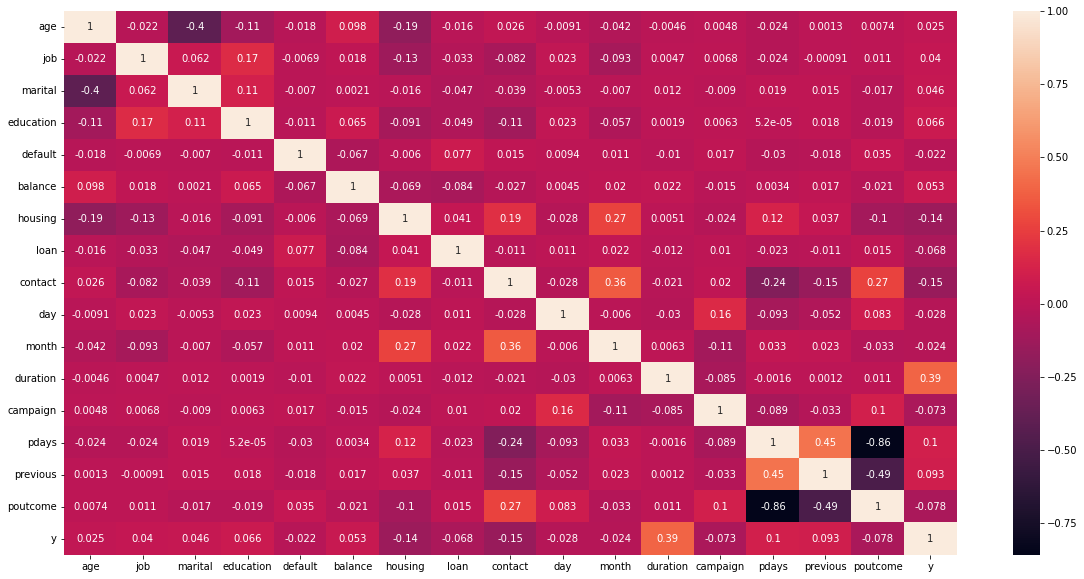

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [26]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
def select_best_features(xfeatures, ylabels,score_fxn=chi2):
    skb = SelectKBest(score_func=score_fxn,k=10)
    best_feature_fit = skb.fit(xfeatures,ylabels)
    best_feat_df = pd.DataFrame({'feature_scores':best_feature_fit.scores_,'feature_name':xfeatures.columns})
    return best_feat_df

In [28]:
Xfeatures = df[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'previous', 'poutcome']]

In [29]:
ylabels = df['y']

In [30]:
best_features = select_best_features(Xfeatures,ylabels)

In [31]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25653,46,9.0,0.0,1.0,0.0,-26,1.0,1.0,0.0,19,9.0,201,1,113,2,1.0,0
37478,38,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,13,8.0,531,2,-1,0,3.0,1
31337,47,1.0,1.0,1.0,0.0,238,1.0,1.0,0.0,13,7.0,3076,1,-1,0,3.0,1
34279,36,6.0,1.0,1.0,0.0,188,1.0,1.0,0.0,4,8.0,1046,3,333,2,2.0,1
28008,48,10.0,0.0,0.0,0.0,840,0.0,0.0,0.0,28,4.0,196,1,-1,0,3.0,0


In [32]:
best_features.nlargest(12,'feature_scores')

,feature_scores,feature_name
10,1.807711e+06,duration
12,3.593220e+03,previous
7,1.253814e+03,contact
11,8.405821e+02,campaign
5,3.889497e+02,housing
1,1.824523e+02,job
6,1.765161e+02,loan
8,1.592004e+02,day
13,1.046775e+02,poutcome
3,9.061772e+01,education


In [33]:
df.shape

(45211, 17)

In [34]:
best_features.nlargest(12,'feature_scores')

,feature_scores,feature_name
10,1.807711e+06,duration
12,3.593220e+03,previous
7,1.253814e+03,contact
11,8.405821e+02,campaign
5,3.889497e+02,housing
1,1.824523e+02,job
6,1.765161e+02,loan
8,1.592004e+02,day
13,1.046775e+02,poutcome
3,9.061772e+01,education


In [35]:
selected_features = best_features.nlargest(15,'feature_scores')['feature_name'].tolist()

In [36]:
#Selected features
Xselected = df[selected_features]

In [37]:
Xselected

,duration,previous,contact,campaign,housing,job,loan,day,poutcome,education,age,month,marital,default
0,261,0,2.0,1,1.0,4.0,0.0,5,3.0,2.0,58,8.0,1.0,0.0
1,151,0,2.0,1,1.0,9.0,0.0,5,3.0,1.0,44,8.0,2.0,0.0
2,76,0,2.0,1,1.0,2.0,1.0,5,3.0,1.0,33,8.0,1.0,0.0
3,92,0,2.0,1,1.0,1.0,0.0,5,3.0,3.0,47,8.0,1.0,0.0
4,198,0,2.0,1,0.0,11.0,0.0,5,3.0,3.0,33,8.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,977,0,0.0,3,0.0,9.0,0.0,17,3.0,2.0,51,9.0,1.0,0.0
45207,456,0,0.0,2,0.0,5.0,0.0,17,3.0,0.0,71,9.0,0.0,0.0
45208,1127,3,0.0,5,0.0,5.0,0.0,17,2.0,1.0,72,9.0,1.0,0.0
45209,508,0,1.0,4,0.0,1.0,0.0,17,3.0,1.0,57,9.0,1.0,0.0


In [39]:
#Train/Test Split dataset
X_train,X_test,y_train,y_test = train_test_split(Xselected,ylabels,test_size=0.3,random_state=42)

In [38]:
#Scaling dataset
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

In [48]:
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
X_train_scaled = sc.transform(X_train)

In [43]:
X_train.head()

,duration,previous,contact,campaign,housing,job,loan,day,poutcome,education,age,month,marital,default
10747,153,0,2.0,4,0.0,9.0,0.0,17,3.0,2.0,36,6.0,2.0,0.0
26054,312,0,0.0,3,0.0,2.0,0.0,19,3.0,1.0,56,9.0,1.0,0.0
9125,83,0,2.0,2,1.0,1.0,0.0,5,3.0,1.0,46,6.0,1.0,0.0
41659,302,5,0.0,1,0.0,4.0,0.0,1,2.0,2.0,41,10.0,0.0,0.0
4443,90,0,2.0,1,1.0,1.0,0.0,20,3.0,1.0,38,8.0,1.0,0.0


In [50]:
#Apply on test data
=X_train.columns.tolist())

In [51]:
X_train_scaled.head()

,duration,previous,contact,campaign,housing,job,loan,day,poutcome,education,age,month,marital,default
0,0.031110,0.000000,1.0,0.048387,0.0,0.818182,0.0,0.533333,1.000000,0.666667,0.233766,0.545455,1.0,0.0
1,0.063440,0.000000,0.0,0.032258,0.0,0.181818,0.0,0.600000,1.000000,0.333333,0.493506,0.818182,0.5,0.0
2,0.016877,0.000000,1.0,0.016129,1.0,0.090909,0.0,0.133333,1.000000,0.333333,0.363636,0.545455,0.5,0.0
3,0.061407,0.018182,0.0,0.000000,0.0,0.363636,0.0,0.000000,0.666667,0.666667,0.298701,0.909091,0.0,0.0
4,0.018300,0.000000,1.0,0.000000,1.0,0.090909,0.0,0.633333,1.000000,0.333333,0.259740,0.727273,0.5,0.0


In [47]:
sc = MinMaxScaler()

In [52]:
X_test_scaled = sc.transform(X_test)

In [54]:
#Convert to DF
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns.tolist())

In [55]:
X_test_scaled

,duration,previous,contact,campaign,housing,job,loan,day,poutcome,education,age,month,marital,default
0,0.039040,0.000000,1.0,0.000000,1.0,0.090909,0.0,0.500000,1.0,0.333333,0.285714,0.727273,0.5,0.0
1,0.016877,0.000000,1.0,0.016129,0.0,0.636364,0.0,0.266667,1.0,0.333333,0.376623,0.545455,1.0,0.0
2,0.045954,0.000000,0.0,0.000000,1.0,0.727273,0.0,0.633333,1.0,0.666667,0.090909,0.000000,1.0,0.0
3,0.063237,0.003636,0.0,0.000000,0.0,0.363636,0.0,0.266667,0.0,0.666667,0.311688,0.000000,0.5,0.0
4,0.024603,0.000000,0.0,0.016129,0.0,0.363636,1.0,0.666667,1.0,0.666667,0.493506,0.454545,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.009557,0.000000,1.0,0.000000,0.0,0.818182,0.0,0.133333,1.0,0.666667,0.363636,0.545455,1.0,0.0
13560,0.027044,0.000000,1.0,0.000000,1.0,0.090909,0.0,0.166667,1.0,0.333333,0.259740,0.727273,0.5,0.0
13561,0.060594,0.000000,1.0,0.032258,0.0,0.000000,0.0,0.966667,1.0,0.333333,0.298701,0.727273,0.5,0.0
13562,0.005693,0.000000,1.0,0.048387,0.0,0.727273,0.0,0.633333,1.0,0.333333,0.298701,0.545455,0.5,0.0


In [56]:
X_train_scaled.shape

(31647, 14)

In [57]:
y_train.unique()

array([0, 1])

In [64]:
input_dim = 14
output_dim =1

In [94]:
#Model building
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [67]:
#Define model
model = Sequential()
model.add(Dense(20,activation='relu', kernel_initializer='he_normal',input_shape=(input_dim,)))
model.add(Dense(16,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(output_dim,activation='softmax'))

In [61]:
def get_hidden_layers_neurons(sample_size,num_input,num_output,alpha=2):
    num_hidden_layers = sample_size/(alpha*(num_input+num_output))
    return num_hidden_layers

In [68]:
#Example for Iris
get_hidden_layers_neurons(150,4,3)

10.714285714285714

In [69]:
#Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 653
Trainable params: 653
Non-trainable params: 0
_________________________________________________________________


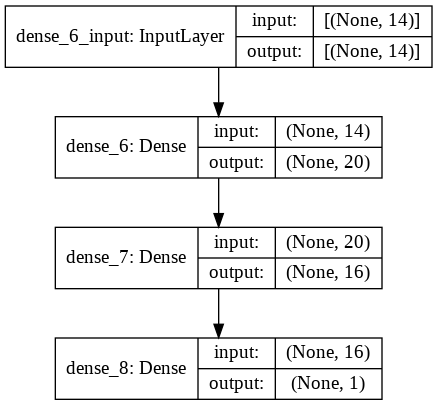

In [71]:
#Visualize model
plot_model(model, to_file='bank_term_prediction_model.png', show_shapes=True)

In [74]:
#Model fit
model.fit(X_train_scaled, y_train,epochs=50,batch_size=32,verbose=2)

Epoch 1/50
989/989 - 1s - loss: 0.2457 - accuracy: 0.1166
Epoch 2/50
989/989 - 1s - loss: 0.2431 - accuracy: 0.1166
Epoch 3/50
989/989 - 1s - loss: 0.2410 - accuracy: 0.1166
Epoch 4/50
989/989 - 1s - loss: 0.2398 - accuracy: 0.1166
Epoch 5/50
989/989 - 1s - loss: 0.2384 - accuracy: 0.1166
Epoch 6/50
989/989 - 1s - loss: 0.2380 - accuracy: 0.1166
Epoch 7/50
989/989 - 1s - loss: 0.2369 - accuracy: 0.1166
Epoch 8/50
989/989 - 1s - loss: 0.2358 - accuracy: 0.1166
Epoch 9/50
989/989 - 1s - loss: 0.2356 - accuracy: 0.1166
Epoch 10/50
989/989 - 1s - loss: 0.2350 - accuracy: 0.1166
Epoch 11/50
989/989 - 1s - loss: 0.2342 - accuracy: 0.1166
Epoch 12/50
989/989 - 1s - loss: 0.2339 - accuracy: 0.1166
Epoch 13/50
989/989 - 1s - loss: 0.2329 - accuracy: 0.1166
Epoch 14/50
989/989 - 1s - loss: 0.2325 - accuracy: 0.1166
Epoch 15/50
989/989 - 1s - loss: 0.2322 - accuracy: 0.1166
Epoch 16/50
989/989 - 1s - loss: 0.2319 - accuracy: 0.1166
Epoch 17/50
989/989 - 1s - loss: 0.2308 - accuracy: 0.1166
Epoch 

In [75]:
#Evaluate model
loss,acc = model.evaluate(X_test_scaled, y_test,verbose=0)

In [76]:
#Check for accuracy
acc

0.11781185120344162

In [77]:
#Check for loss
loss

0.23390193283557892

In [79]:
#Make prediction
ex1 = X_test_scaled.iloc[0]
print(ex1)

duration     0.039040
previous     0.000000
contact      1.000000
campaign     0.000000
housing      1.000000
job          0.090909
loan         0.000000
day          0.500000
poutcome     1.000000
education    0.333333
age          0.285714
month        0.727273
marital      0.500000
default      0.000000
Name: 0, dtype: float64


In [80]:
#Expected value
y_test.iloc[0]

0

In [81]:
#Predict
#Reshape dataset
sample1 = np.array(ex1).reshape(1,-1)

In [82]:
sample1

array([[0.03904026, 0.        , 1.        , 0.        , 1.        ,
        0.09090909, 0.        , 0.5       , 1.        , 0.33333333,
        0.28571429, 0.72727273, 0.5       , 0.        ]])

In [83]:
#Probabilities
probabilities = model.predict(sample1)

In [84]:
probabilities

array([[1.]], dtype=float32)

In [85]:
#Actual prediction
np.argmax(probabilities)

0

In [86]:
#Save Model
model.save('bank_term_predictor_model_3_oct_2021.h5')

In [87]:
#Load Model
from tensorflow.keras.models import load_model

In [88]:
new_model = load_model('bank_term_predictor_model_3_oct_2021.h5')

In [89]:
# Summary of model
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 653
Trainable params: 653
Non-trainable params: 0
_________________________________________________________________


In [90]:
#Visualize Training & Loss Curve

In [91]:
history = model.fit(Xselected, ylabels,epochs=20,batch_size=32,verbose=0,validation_split=.3)

In [92]:
#Plot it
history.history['loss']

[1.444341778755188,
 0.491664856672287,
 0.3813607692718506,
 0.3871009647846222,
 0.33583593368530273,
 0.38079193234443665,
 0.3688296973705292,
 0.418958842754364,
 0.33662280440330505,
 0.404371052980423,
 0.37777063250541687,
 0.3797856271266937,
 0.3715173602104187,
 0.3547486662864685,
 0.34441012144088745,
 0.4130716621875763,
 0.35044917464256287,
 0.3974570333957672,
 0.4236021935939789,
 0.3622688949108124]

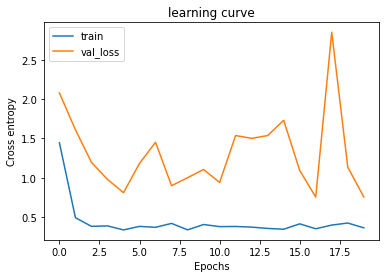

In [93]:
plt.title("learning curve")
plt.xlabel('Epochs')
plt.ylabel('Cross entropy')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [96]:
#using Droput on Visible Input Layer
model2 = Sequential()
model2.add(Dropout(0.2, input_shape=(input_dim,)))
model2.add(Dense(20,activation='relu', kernel_initializer='he_normal',input_shape=(input_dim,)))
model2.add(Dense(16,activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(output_dim,activation='softmax'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model2.fit(X_train_scaled,y_train,epochs=50,batch_size=32,verbose=2)

Epoch 1/50
989/989 - 2s - loss: 0.3578 - accuracy: 0.1166
Epoch 2/50
989/989 - 1s - loss: 0.3090 - accuracy: 0.1166
Epoch 3/50
989/989 - 1s - loss: 0.2962 - accuracy: 0.1166
Epoch 4/50
989/989 - 1s - loss: 0.2895 - accuracy: 0.1166
Epoch 5/50
989/989 - 1s - loss: 0.2883 - accuracy: 0.1166
Epoch 6/50
989/989 - 1s - loss: 0.2844 - accuracy: 0.1166
Epoch 7/50
989/989 - 1s - loss: 0.2868 - accuracy: 0.1166
Epoch 8/50
989/989 - 1s - loss: 0.2852 - accuracy: 0.1166
Epoch 9/50
989/989 - 1s - loss: 0.2806 - accuracy: 0.1166
Epoch 10/50
989/989 - 1s - loss: 0.2824 - accuracy: 0.1166
Epoch 11/50
989/989 - 1s - loss: 0.2818 - accuracy: 0.1166
Epoch 12/50
989/989 - 1s - loss: 0.2804 - accuracy: 0.1166
Epoch 13/50
989/989 - 1s - loss: 0.2811 - accuracy: 0.1166
Epoch 14/50
989/989 - 1s - loss: 0.2819 - accuracy: 0.1166
Epoch 15/50
989/989 - 1s - loss: 0.2781 - accuracy: 0.1166
Epoch 16/50
989/989 - 1s - loss: 0.2807 - accuracy: 0.1166
Epoch 17/50
989/989 - 1s - loss: 0.2780 - accuracy: 0.1166
Epoch 

In [97]:
#Evaluate
loss2,acc2 = model2.evaluate(X_test_scaled,y_test,verbose=0)

In [98]:
loss2

0.27283158898353577

In [99]:
acc2

0.11781185120344162

In [101]:
#Deep Learning with Scikit-Learn
from sklearn.neural_network import MLPClassifier

In [103]:
#Init
mlp_nn = MLPClassifier(max_iter=50,random_state=42)

In [105]:
mlp_nn.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [106]:
#accuracy
mlp_nn.score(X_test_scaled,y_test)

0.8990710704806841

In [107]:
mlp_nn.predict(sample1)

array([0])